In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gamma
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import os
import datetime
from matplotlib.dates import DateFormatter
from IPython.display import display
from glob import glob
import time
import datetime
import concurrent.futures
import sys
np.set_printoptions(threshold=sys.maxsize)
mean = 3.99
std = 2.96
alpha = (mean / std) ** 2
beta = mean / std ** 2
fig = plt.figure(figsize=[15, 5])
row = 1
col = 1
num_fig = 1
import matplotlib.ticker as mticker
step = 7
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
from scipy.signal import correlate
from scipy.signal import correlation_lags
from datetime import timedelta


<Figure size 1500x500 with 0 Axes>

In [2]:
reply_df_liwc = pd.read_csv('Weekly/Texas_Tweets_Replies/Reply_LIWC_1.csv', index_col=0)
reply_df_liwc = reply_df_liwc.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_liwc['Tweet Date'] = reply_df_liwc['Tweet Date'].str.replace("'", "").str.replace("T", " ").str.replace("Z", "").str.split(' ').str[0]
reply_df_liwc['Reply_Date'] = reply_df_liwc['Reply_Date'].str.split(' ').str[0]
reply_df_liwc['Tweet Date'] = pd.to_datetime(reply_df_liwc['Tweet Date'])
reply_df_liwc['Reply_Date'] = pd.to_datetime(reply_df_liwc['Reply_Date'])
reply_df_liwc = reply_df_liwc.drop(['Segment'], axis=1)
Tweet_df_liwc = pd.read_csv('Weekly/Texas_Tweets_Replies/Tweet_LIWC_1.csv', index_col=0)
Tweet_df_liwc = Tweet_df_liwc.drop(['Segment'], axis=1)
Tweet_df_liwc = Tweet_df_liwc.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_liwc['Date'] = pd.to_datetime(Tweet_df_liwc['Date'])
Tweet_df_liwc = Tweet_df_liwc.sort_values(by='Date')
reply_df_liwc = reply_df_liwc[((reply_df_liwc['Reply_Date'] >= reply_df_liwc['Tweet Date']) & (reply_df_liwc['Reply_Date'] <= reply_df_liwc['Tweet Date'] + timedelta(days=10)))]
reply_df_liwc

reply_df_AS = pd.read_csv('Weekly/Texas_Tweets_Replies/Reply_AS.csv', index_col=0)
reply_df_AS = reply_df_AS.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_AS = reply_df_AS.drop(['Segment', 'Replied Tweets Text', 'Tweet Date', 'Reply_Date', 'user_account_id'], axis=1)
reply_df_AS = reply_df_AS.rename(columns={'New_Category': 'Reply_AS'})
Tweet_df_AS = pd.read_csv('Weekly/Texas_Tweets_Replies/Tweet_AS.csv', index_col=0)
Tweet_df_AS = Tweet_df_AS.drop(['Segment'], axis=1)
Tweet_df_AS = Tweet_df_AS.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_AS = Tweet_df_AS.rename(columns={'New_Category': 'Tweet_AS'})
Tweet_df_AS['Date'] = pd.to_datetime(Tweet_df_AS['Date'])
Tweet_df_AS = Tweet_df_AS.sort_values(by='Date')
Tweet_df_AS = Tweet_df_AS.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
Tweet_df_AS

reply_df_CPL = pd.read_csv('Weekly/Texas_Tweets_Replies/Reply_CPL.csv', index_col=0)
reply_df_CPL = reply_df_CPL.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_CPL = reply_df_CPL.drop(['Segment', 'Replied Tweets Text', 'Tweet Date', 'Reply_Date', 'user_account_id'], axis=1)
reply_df_CPL = reply_df_CPL.rename(columns={'New_Category': 'Reply_CPL'})
Tweet_df_CPL = pd.read_csv('Weekly/Texas_Tweets_Replies/Tweet_CPL.csv', index_col=0)
Tweet_df_CPL = Tweet_df_CPL.drop(['Segment'], axis=1)
Tweet_df_CPL = Tweet_df_CPL.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_CPL = Tweet_df_CPL.rename(columns={'New_Category': 'Tweet_CPL'})
Tweet_df_CPL['Date'] = pd.to_datetime(Tweet_df_CPL['Date'])
Tweet_df_CPL = Tweet_df_CPL.sort_values(by='Date')
Tweet_df_CPL = Tweet_df_CPL.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
reply_df_CPL

reply_df_Big2_agency = pd.read_csv('Weekly/Texas_Tweets_Replies/Reply_agency.csv', index_col=0)
reply_df_Big2_agency = reply_df_Big2_agency.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_Big2_agency = reply_df_Big2_agency.drop(['Segment', 'Replied Tweets Text', 'Tweet Date', 'Reply_Date', 'user_account_id'], axis=1)
reply_df_Big2_agency = reply_df_Big2_agency.rename(columns={'New_Category': 'Reply_Big2_agency'})
Tweet_df_Big2_agency  = pd.read_csv('Weekly/Texas_Tweets_Replies/Tweet_agency.csv', index_col=0)
Tweet_df_Big2_agency  = Tweet_df_Big2_agency.drop(['Segment'], axis=1)
Tweet_df_Big2_agency = Tweet_df_Big2_agency.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_Big2_agency = Tweet_df_Big2_agency.rename(columns={'New_Category': 'Tweet_agency'})
Tweet_df_Big2_agency['Date'] = pd.to_datetime(Tweet_df_Big2_agency['Date'])
Tweet_df_Big2_agency = Tweet_df_Big2_agency.sort_values(by='Date')
Tweet_df_Big2_agency = Tweet_df_Big2_agency.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
reply_df_Big2_agency

reply_df_Big2_communion = pd.read_csv('Weekly/Texas_Tweets_Replies/Reply_value_communion.csv', index_col=0)
reply_df_Big2_communion = reply_df_Big2_communion.dropna(axis=0, subset=['Replied Tweets Text', 'Reply_Date'])
reply_df_Big2_communion = reply_df_Big2_communion.drop(['Segment', 'Replied Tweets Text', 'Tweet Date', 'Reply_Date', 'user_account_id'], axis=1)
reply_df_Big2_communion = reply_df_Big2_communion.rename(columns={'New_Category': 'Reply_Big2_communion'})
Tweet_df_Big2_communion = pd.read_csv('Weekly/Texas_Tweets_Replies/Tweet_value_communion.csv', index_col=0)
Tweet_df_Big2_communion = Tweet_df_Big2_communion.drop(['Segment'], axis=1)
Tweet_df_Big2_communion = Tweet_df_Big2_communion.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_Big2_communion = Tweet_df_Big2_communion.rename(columns={'New_Category': 'Tweet_value_communion'})
Tweet_df_Big2_communion['Date'] = pd.to_datetime(Tweet_df_Big2_communion['Date'])
Tweet_df_Big2_communion = Tweet_df_Big2_communion.sort_values(by='Date')
Tweet_df_Big2_communion = Tweet_df_Big2_communion.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
reply_df_Big2_communion

reply_df_power = pd.read_csv('Weekly/Texas_Tweets_Replies/Reply_power.csv', index_col=0)
reply_df_power = reply_df_power.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_power = reply_df_power.drop(['Segment'], axis=1)
reply_df_power = reply_df_power.rename(columns={'New_Category': 'Reply_power'})
Tweet_df_power = pd.read_csv('Weekly/Texas_Tweets_Replies/Tweet_power.csv', index_col=0)
Tweet_df_power = Tweet_df_power.drop(['Segment'], axis=1)
Tweet_df_power = Tweet_df_power.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_power = Tweet_df_power.rename(columns={'New_Category': 'Tweet_power'})
Tweet_df_power['Date'] = pd.to_datetime(Tweet_df_power['Date'])
Tweet_df_power = Tweet_df_power.sort_values(by='Date')
Tweet_df_power = Tweet_df_power.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
reply_df_power

# FOR LIWC
reply_df_liwc["mean_reply_i"] = reply_df_liwc.groupby('Tweet ID')['i'].transform('mean')
reply_df_liwc["mean_reply_we"] = reply_df_liwc.groupby('Tweet ID')['we'].transform('mean')
reply_df_liwc["mean_reply_Affect"] = reply_df_liwc.groupby('Tweet ID')['Affect'].transform('mean')
reply_df_liwc["mean_reply_tone_pos"] = reply_df_liwc.groupby('Tweet ID')['tone_pos'].transform('mean')
reply_df_liwc["mean_reply_tone_neg"] = reply_df_liwc.groupby('Tweet ID')['tone_neg'].transform('mean')
reply_df_liwc["mean_reply_emotion"] = reply_df_liwc.groupby('Tweet ID')['emotion'].transform('mean')
reply_df_liwc["mean_reply_emo_pos"] = reply_df_liwc.groupby('Tweet ID')['emo_neg'].transform('mean')
reply_df_liwc["mean_reply_emo_neg"] = reply_df_liwc.groupby('Tweet ID')['emo_neg'].transform('mean')
reply_df_liwc["mean_reply_emo_anx"] = reply_df_liwc.groupby('Tweet ID')['emo_anx'].transform('mean')
reply_df_liwc["mean_reply_emo_anger"] = reply_df_liwc.groupby('Tweet ID')['emo_anger'].transform('mean')
reply_df_liwc["mean_reply_emo_sad"] = reply_df_liwc.groupby('Tweet ID')['emo_sad'].transform('mean')
reply_df_liwc["mean_reply_swear"] = reply_df_liwc.groupby('Tweet ID')['swear'].transform('mean')
reply_df_liwc["mean_reply_Social"] = reply_df_liwc.groupby('Tweet ID')['Social'].transform('mean')
reply_df_liwc["mean_reply_socbehav"] = reply_df_liwc.groupby('Tweet ID')['socbehav'].transform('mean')
reply_df_liwc["mean_reply_prosocial"] = reply_df_liwc.groupby('Tweet ID')['prosocial'].transform('mean')
reply_df_liwc["mean_reply_polite"] = reply_df_liwc.groupby('Tweet ID')['polite'].transform('mean')
reply_df_liwc["mean_reply_conflict"] = reply_df_liwc.groupby('Tweet ID')['conflict'].transform('mean')
reply_df_liwc["mean_reply_swear"] = reply_df_liwc.groupby('Tweet ID')['swear'].transform('mean')
reply_df_liwc["mean_reply_moral"] = reply_df_liwc.groupby('Tweet ID')['moral'].transform('mean')
reply_df_liwc["mean_reply_comm"] = reply_df_liwc.groupby('Tweet ID')['comm'].transform('mean')
reply_df_liwc["mean_reply_money"] = reply_df_liwc.groupby('Tweet ID')['money'].transform('mean')
reply_df_liwc["mean_reply_relig"] = reply_df_liwc.groupby('Tweet ID')['relig'].transform('mean')
reply_df_liwc["mean_reply_death"] = reply_df_liwc.groupby('Tweet ID')['death'].transform('mean')
reply_df_liwc["mean_reply_risk"] = reply_df_liwc.groupby('Tweet ID')['risk'].transform('mean')
reply_df_liwc["mean_reply_focuspast"] = reply_df_liwc.groupby('Tweet ID')['focuspast'].transform('mean')
reply_df_liwc["mean_reply_focusfuture"] = reply_df_liwc.groupby('Tweet ID')['focusfuture'].transform('mean')
reply_df_liwc_mean = reply_df_liwc[['Tweet ID',\
       'mean_reply_i', 'mean_reply_we', 'mean_reply_Affect', 'mean_reply_tone_pos', 'mean_reply_tone_neg',\
       'mean_reply_emotion', 'mean_reply_emo_pos', 'mean_reply_emo_neg', 'mean_reply_emo_anx', 'mean_reply_emo_anger', 'mean_reply_emo_sad',\
       'mean_reply_swear', 'mean_reply_Social', 'mean_reply_socbehav', 'mean_reply_prosocial', 'mean_reply_polite', 'mean_reply_conflict',\
       'mean_reply_moral', 'mean_reply_comm', 'mean_reply_money', 'mean_reply_relig', 'mean_reply_death', 'mean_reply_risk', 'mean_reply_focuspast',\
       'mean_reply_focusfuture']].copy()
reply_df_liwc_mean = reply_df_liwc_mean.drop_duplicates()

# FOR AS
reply_df_AS["mean_reply_AS"] = reply_df_AS.groupby('Tweet ID')['Reply_AS'].transform('mean')
reply_df_AS_mean = reply_df_AS[['Tweet ID', 'mean_reply_AS']].copy()
reply_df_AS_mean = reply_df_AS_mean.drop_duplicates()

# FOR CPL
reply_df_CPL["mean_reply_CPL"] = reply_df_CPL.groupby('Tweet ID')['Reply_CPL'].transform('mean')
reply_df_CPL_mean = reply_df_CPL[['Tweet ID', 'mean_reply_CPL']].copy()
reply_df_CPL_mean = reply_df_CPL_mean.drop_duplicates()

# FOR Big2 Agency
reply_df_Big2_agency["mean_reply_agency"] = reply_df_Big2_agency.groupby('Tweet ID')['Reply_Big2_agency'].transform('mean')
reply_df_Big2_agency_mean = reply_df_Big2_agency[['Tweet ID', 'mean_reply_agency']].copy()
reply_df_Big2_agency_mean = reply_df_Big2_agency_mean.drop_duplicates()

# FOR Big2 Communion
reply_df_Big2_communion["mean_reply_communion"] = reply_df_Big2_communion.groupby('Tweet ID')['Reply_Big2_communion'].transform('mean')
reply_df_Big2_communion_mean = reply_df_Big2_communion[['Tweet ID', 'mean_reply_communion']].copy()
reply_df_Big2_communion_mean = reply_df_Big2_communion_mean.drop_duplicates()

# FOR Power
reply_df_power["mean_reply_power"] = reply_df_power.groupby('Tweet ID')['Reply_power'].transform('mean')
reply_df_power = reply_df_power[['Tweet ID', 'mean_reply_power']].copy()
reply_df_power = reply_df_power.drop_duplicates()

merge_df_reply = reply_df_liwc_mean.merge(reply_df_AS_mean, on="Tweet ID", how='outer').merge(reply_df_CPL_mean, on="Tweet ID", how='outer').merge(reply_df_Big2_agency_mean, on="Tweet ID", how='outer').merge(reply_df_Big2_communion_mean, on="Tweet ID", how='outer').merge(reply_df_power, on="Tweet ID", how='outer')
merge_df_reply = merge_df_reply.fillna(0)
merge_df_reply

merge_df_tweet = Tweet_df_liwc.merge(Tweet_df_AS, on="Tweet ID", how='outer').merge(Tweet_df_CPL, on="Tweet ID", how='outer').merge(Tweet_df_Big2_agency, on="Tweet ID", how='outer').merge(Tweet_df_Big2_communion, on="Tweet ID", how='outer').merge(Tweet_df_power, on="Tweet ID", how='outer')
merge_df_tweet = merge_df_tweet.fillna(0)
merge_df_tweet

merge_df = merge_df_tweet.merge(merge_df_reply, on="Tweet ID", how='outer')
merge_df = merge_df.dropna(axis=0, how='any')
merge_df_wo_text = merge_df.drop(['Original_Tweet_Text', 'Updated_Clean_Text', 'Tweet ID'], axis=1)
merge_df


,Date,Tweet ID,Original_Tweet_Text,Updated_Clean_Text,i,we,power,Affect,tone_pos,tone_neg,...,mean_reply_death,mean_reply_risk,mean_reply_focuspast,mean_reply_focusfuture,mean_reply_AS,mean_reply_CPL,mean_reply_agency,mean_reply_communion,mean_reply_power,author_name
0,2020-03-01,1234025618892902400,There are currently zero confirmed cases of #C...,There are currently zero confirmed cases of CO...,0.00,3.03,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.275000,0.000000,RepColinAllred
1,2020-03-01,1234163810505719810,🚨#COVID19 update:\nThere are currently zero co...,COVID19 update There are currently zero confi...,0.00,0.00,2.27,2.27,0.00,2.27,...,0.071429,0.139429,4.051429,2.015143,1.600541,0.313243,4.347027,1.628333,0.000000,RepMaryGonzalez
6,2020-03-02,1234287498181926912,Today we learned that the CDC mistakenly relea...,Today we learned that the CDC mistakenly relea...,0.00,2.08,2.08,4.17,0.00,4.17,...,0.250432,0.362955,2.811068,0.908636,0.730341,0.300932,3.615250,1.982909,0.419955,RepVeasey
7,2020-03-03,1234656057865179136,No confirmed cases of coronavirus in Harris Co...,No confirmed cases of coronavirus in Harris Co...,0.00,0.00,8.33,0.00,0.00,0.00,...,0.000000,0.000000,10.000000,0.000000,2.500000,0.556000,17.056000,0.695000,2.000000,AugustPfluger
9,2020-03-04,1235326329526145024,.@SAMetroHealth has launched a COVID-19 (forme...,SAMetroHealth has launched a COVID 19 formerl...,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,RepMcCaul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,2023-03-20,1637860231819452419,HEARING ALERT: Multiple bills dealing with COV...,HEARING ALERT Multiple bills dealing with COVI...,0.00,0.00,5.56,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,RepEBJ
7000,2023-03-28,1640789602092056576,Joe Biden said we “vastly exaggerate” when it ...,Joe Biden said we vastly exaggerate when it co...,0.00,2.08,6.25,4.17,0.00,4.17,...,0.201360,0.401200,2.685360,0.348720,0.657656,0.147187,5.735937,2.787891,0.322734,AnaMariaForHD135
7001,2023-04-07,1644352681358630912,🚨 MOB BOSS nephew involved in BIDEN family bus...,MOB BOSS nephew involved in BIDEN family busi...,0.00,0.00,8.33,2.78,2.78,0.00,...,0.177248,0.426812,1.836485,0.476022,0.476911,0.135691,7.950976,2.621816,0.339241,ArlingtonTxFire
7002,2023-04-12,1646182409073750018,The following letter from Texas healthcare pro...,The following letter from Texas healthcare pro...,0.00,0.00,2.13,2.13,2.13,0.00,...,0.555263,0.150526,1.754737,6.494737,0.960476,0.153810,5.679048,3.230000,1.326667,Ron_Nirenberg


# Date-wise

In [3]:
import tweepy, json, glob, pickle, pendulum
from datetime import timedelta
import requests
import os
import json
import pandas as pd
import csv
import datetime
import dateutil.parser
import unicodedata
import time

os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAMbGowEAAAAAfjvpTk4ECTFfOHZWyMEtmY77Y4A%3DapbK97SBeY0ruSDgHVW8RK2QDzDI2HbngkymyFjdUaZ5uVa31j'

def auth():
    return os.getenv('TOKEN')

bearer_token = auth()

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

headers = create_headers(bearer_token)

def get_userID_of_particular_tweet_id(tweetID, max_results = 500):
    #Change to the endpoint you want to collect data from
    search_url = "https://api.twitter.com/2/tweets/{}".format(tweetID)
    query_params = {'tweet.fields': 'author_id',
                    'pagination_token': {} }
    return (search_url, query_params)

def connect_to_particular_tweet_id_endpoint(url, headers, params=None, next_token = None):
    response = requests.request("GET", url, headers = headers, params = params)
    time.sleep(5)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

temp_temp_df = merge_df[['Date', 'Tweet ID', 'Original_Tweet_Text', 'Updated_Clean_Text']]
idx = temp_temp_df[((temp_temp_df['Date'] >= '2020-03-01') & (temp_temp_df['Date'] <= '2021-12-31'))]
idx.reset_index(drop=True)
tweetIDs = idx['Tweet ID'].tolist()

verified_userID_info = {}

for tweetID in tweetIDs:
    replies_url = get_userID_of_particular_tweet_id(tweetID, max_results = 500)
    replies_json_response = connect_to_particular_tweet_id_endpoint(replies_url[0], headers, replies_url[1])
    json_str = json.dumps(replies_json_response, indent=4, sort_keys=True)
    resp = json.loads(json_str)
    if resp.get('data') is not None:
        verified_userID_info[tweetID] = resp.get('data').get('author_id')

Exception: (403, '{"client_id":"27510470","detail":"When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.","registration_url":"https://developer.twitter.com/en/docs/projects/overview","title":"Client Forbidden","required_enrollment":"Appropriate Level of API Access","reason":"client-not-enrolled","type":"https://api.twitter.com/2/problems/client-forbidden"}')

In [ ]:
import json

with open('verified_userID_info_Texas.json', 'w') as fp:
    json.dump(verified_userID_info, fp)

In [ ]:
idx.columns = ['Date', 'Tweet_ID', 'Original_Tweet_Text', 'Updated_Clean_Text']
idx['author_id'] = idx.Tweet_ID.map(verified_userID_info)
idx = idx.dropna().reset_index(drop=True).sort_values(by='Date')
idx

In [ ]:
def get_username_of_particular_user_id(userID, max_results = 500):
    #Change to the endpoint you want to collect data from
    search_url = "https://api.twitter.com/2/users/{}".format(userID)
    query_params = {'user.fields': 'name',
                    'pagination_token': {} }
    return (search_url, query_params)

def connect_to_particular_user_id_endpoint(url, headers, params=None, next_token = None):
    response = requests.request("GET", url, headers = headers, params = params)
    time.sleep(5)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

top_author_ids = idx['author_id'].value_counts()[idx['author_id'].value_counts() == idx['author_id'].value_counts()]
top_author_ids_df_top_20 = top_author_ids.to_frame().reset_index().head(20)
top_author_ids_df_top_20 = top_author_ids_df_top_20.rename(columns= {'index': 'author_id', 'author_id': 'Number of occurrence'})
authorIDs = top_author_ids_df_top_20['author_id'].tolist()
top_author_ids_df_top_20

verified_username_info = {}
verified_account_name_info = {}

for userID in authorIDs:
    replies_url = get_username_of_particular_user_id(userID, max_results = 500)
    replies_json_response = connect_to_particular_user_id_endpoint(replies_url[0], headers, replies_url[1])
    json_str = json.dumps(replies_json_response, indent=4, sort_keys=True)
    resp = json.loads(json_str)
    if resp.get('data') is not None:
        verified_account_name_info[userID] = resp.get('data').get('name')
        verified_username_info[userID] = resp.get('data').get('username')
        

In [4]:
idx = merge_df
idx

,Date,Tweet ID,Original_Tweet_Text,Updated_Clean_Text,i,we,power,Affect,tone_pos,tone_neg,...,mean_reply_death,mean_reply_risk,mean_reply_focuspast,mean_reply_focusfuture,mean_reply_AS,mean_reply_CPL,mean_reply_agency,mean_reply_communion,mean_reply_power,author_name
0,2020-03-01,1234025618892902400,There are currently zero confirmed cases of #C...,There are currently zero confirmed cases of CO...,0.00,3.03,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.275000,0.000000,RepColinAllred
1,2020-03-01,1234163810505719810,🚨#COVID19 update:\nThere are currently zero co...,COVID19 update There are currently zero confi...,0.00,0.00,2.27,2.27,0.00,2.27,...,0.071429,0.139429,4.051429,2.015143,1.600541,0.313243,4.347027,1.628333,0.000000,RepMaryGonzalez
6,2020-03-02,1234287498181926912,Today we learned that the CDC mistakenly relea...,Today we learned that the CDC mistakenly relea...,0.00,2.08,2.08,4.17,0.00,4.17,...,0.250432,0.362955,2.811068,0.908636,0.730341,0.300932,3.615250,1.982909,0.419955,RepVeasey
7,2020-03-03,1234656057865179136,No confirmed cases of coronavirus in Harris Co...,No confirmed cases of coronavirus in Harris Co...,0.00,0.00,8.33,0.00,0.00,0.00,...,0.000000,0.000000,10.000000,0.000000,2.500000,0.556000,17.056000,0.695000,2.000000,AugustPfluger
9,2020-03-04,1235326329526145024,.@SAMetroHealth has launched a COVID-19 (forme...,SAMetroHealth has launched a COVID 19 formerl...,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,RepMcCaul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,2023-03-20,1637860231819452419,HEARING ALERT: Multiple bills dealing with COV...,HEARING ALERT Multiple bills dealing with COVI...,0.00,0.00,5.56,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,RepEBJ
7000,2023-03-28,1640789602092056576,Joe Biden said we “vastly exaggerate” when it ...,Joe Biden said we vastly exaggerate when it co...,0.00,2.08,6.25,4.17,0.00,4.17,...,0.201360,0.401200,2.685360,0.348720,0.657656,0.147187,5.735937,2.787891,0.322734,AnaMariaForHD135
7001,2023-04-07,1644352681358630912,🚨 MOB BOSS nephew involved in BIDEN family bus...,MOB BOSS nephew involved in BIDEN family busi...,0.00,0.00,8.33,2.78,2.78,0.00,...,0.177248,0.426812,1.836485,0.476022,0.476911,0.135691,7.950976,2.621816,0.339241,ArlingtonTxFire
7002,2023-04-12,1646182409073750018,The following letter from Texas healthcare pro...,The following letter from Texas healthcare pro...,0.00,0.00,2.13,2.13,2.13,0.00,...,0.555263,0.150526,1.754737,6.494737,0.960476,0.153810,5.679048,3.230000,1.326667,Ron_Nirenberg


In [6]:
# import json

# with open('verified_username_info_Texas.json', 'w') as fp:
#     json.dump(verified_username_info, fp)

In [8]:
# idx.columns = ['Date', 'Tweet_ID', 'author_id']
# idx['author_name'] = idx.author_id.map(verified_username_info)
# idx = idx.dropna().reset_index(drop=True).sort_values(by='Date')
# idx

In [9]:
idx = idx.rename(columns={'Tweet_ID': 'Tweet ID'})
idx

,Date,Tweet ID,Original_Tweet_Text,Updated_Clean_Text,i,we,power,Affect,tone_pos,tone_neg,...,mean_reply_death,mean_reply_risk,mean_reply_focuspast,mean_reply_focusfuture,mean_reply_AS,mean_reply_CPL,mean_reply_agency,mean_reply_communion,mean_reply_power,author_name
0,2020-03-01,1234025618892902400,There are currently zero confirmed cases of #C...,There are currently zero confirmed cases of CO...,0.00,3.03,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.275000,0.000000,RepColinAllred
1,2020-03-01,1234163810505719810,🚨#COVID19 update:\nThere are currently zero co...,COVID19 update There are currently zero confi...,0.00,0.00,2.27,2.27,0.00,2.27,...,0.071429,0.139429,4.051429,2.015143,1.600541,0.313243,4.347027,1.628333,0.000000,RepMaryGonzalez
6,2020-03-02,1234287498181926912,Today we learned that the CDC mistakenly relea...,Today we learned that the CDC mistakenly relea...,0.00,2.08,2.08,4.17,0.00,4.17,...,0.250432,0.362955,2.811068,0.908636,0.730341,0.300932,3.615250,1.982909,0.419955,RepVeasey
7,2020-03-03,1234656057865179136,No confirmed cases of coronavirus in Harris Co...,No confirmed cases of coronavirus in Harris Co...,0.00,0.00,8.33,0.00,0.00,0.00,...,0.000000,0.000000,10.000000,0.000000,2.500000,0.556000,17.056000,0.695000,2.000000,AugustPfluger
9,2020-03-04,1235326329526145024,.@SAMetroHealth has launched a COVID-19 (forme...,SAMetroHealth has launched a COVID 19 formerl...,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,RepMcCaul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,2023-03-20,1637860231819452419,HEARING ALERT: Multiple bills dealing with COV...,HEARING ALERT Multiple bills dealing with COVI...,0.00,0.00,5.56,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,RepEBJ
7000,2023-03-28,1640789602092056576,Joe Biden said we “vastly exaggerate” when it ...,Joe Biden said we vastly exaggerate when it co...,0.00,2.08,6.25,4.17,0.00,4.17,...,0.201360,0.401200,2.685360,0.348720,0.657656,0.147187,5.735937,2.787891,0.322734,AnaMariaForHD135
7001,2023-04-07,1644352681358630912,🚨 MOB BOSS nephew involved in BIDEN family bus...,MOB BOSS nephew involved in BIDEN family busi...,0.00,0.00,8.33,2.78,2.78,0.00,...,0.177248,0.426812,1.836485,0.476022,0.476911,0.135691,7.950976,2.621816,0.339241,ArlingtonTxFire
7002,2023-04-12,1646182409073750018,The following letter from Texas healthcare pro...,The following letter from Texas healthcare pro...,0.00,0.00,2.13,2.13,2.13,0.00,...,0.555263,0.150526,1.754737,6.494737,0.960476,0.153810,5.679048,3.230000,1.326667,Ron_Nirenberg


In [125]:
# merge_df_reply = idx.merge(merge_df, on="Tweet ID", how='outer')
# merge_df_reply = merge_df_reply.dropna()
# merge_df_reply

# idx = idx.drop(['Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
merge_df_reply = idx
merge_df_reply = merge_df_reply[((merge_df_reply['Date'] >= '2020-10-01') & (merge_df_reply['Date'] <= '2020-12-31'))]
merge_df_reply


,Date,Tweet ID,Original_Tweet_Text,Updated_Clean_Text,i,we,power,Affect,tone_pos,tone_neg,...,mean_reply_death,mean_reply_risk,mean_reply_focuspast,mean_reply_focusfuture,mean_reply_AS,mean_reply_CPL,mean_reply_agency,mean_reply_communion,mean_reply_power,author_name
3896,2020-10-01,1311805864874053634,@TelemundoHou EN VIVO! @Ignunez con nuestro pr...,TelemundoHou EN VIVO Ignunez con nuestro prop...,0.0,0.00,5.56,0.00,0.00,0.0,...,0.000,0.00,0.00000,0.000,0.000,0.0000,0.000000,0.0000,0.0,RepLloydDoggett
3901,2020-10-01,1311797720336805888,Just a quick reminder to wear your mask or fac...,Just a quick reminder to wear your mask or fac...,0.0,7.14,0.00,2.38,2.38,0.0,...,0.000,0.00,5.25000,0.000,0.725,0.0000,1.766667,2.3660,0.0,ArlingtonTxFire
3903,2020-10-01,1311778320837742592,"🚨As of today Oct 1st (4pm), there are 143,530 ...",As of today Oct 1st 4pm there are 143 530 con...,0.0,0.00,0.00,4.76,4.76,0.0,...,0.000,0.00,4.08000,0.000,0.000,1.1375,1.137500,0.0000,0.0,RepPatFallon
3905,2020-10-01,1311752847827107842,¿Sabe si tiene #COVID19? ¡Obtenga una prueba #...,Sabe si tiene COVID19 Obtenga una prueba GRAT...,0.0,0.00,0.00,0.00,0.00,0.0,...,0.000,0.00,0.00000,0.000,0.000,0.0000,0.000000,3.2300,0.0,MacTXPress
3906,2020-10-01,1311748081038372869,Do you know your #COVID19 status? Get a #FREE ...,Do you know your COVID19 status Get a FREE Tes...,0.0,4.55,0.00,4.55,4.55,0.0,...,0.000,0.00,0.00000,0.000,3.570,0.0000,3.570000,3.5700,0.0,RepGaryVanDeaver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,2020-12-31,1344453640334008320,Vaccine questions? They might have been answer...,Vaccine questions They might have been answere...,0.0,0.00,0.00,0.00,0.00,0.0,...,0.294,0.00,1.52100,1.990,0.901,0.0000,2.124000,1.4050,0.0,chiproytx
5064,2020-12-31,1344787999742111750,"As we close out #2020, we remain grateful to t...",As we close out 2020 we remain grateful to the...,0.0,9.76,0.00,9.76,9.76,0.0,...,4.350,0.00,1.78500,4.350,0.000,4.3500,5.745000,1.7850,0.0,Jon_RosenthalTX
5066,2020-12-31,1344766237339955201,"🚨As of today Dec 31 (4pm), there are 237,727 c...",As of today Dec 31 4pm there are 237 727 conf...,0.0,0.00,0.00,4.76,4.76,0.0,...,0.000,0.00,1.46125,0.000,0.000,0.0000,0.500000,0.8625,0.0,RepKevinBrady
5067,2020-12-31,1344750297512603662,"Social distancing, also called “physical dista...",Social distancing also called physical distanc...,0.0,0.00,0.00,8.70,8.70,0.0,...,2.910,1.47,1.47000,2.175,1.470,2.9100,8.735000,1.4700,0.0,Lizzie4Congress


In [126]:
# verified_username_info

In [127]:
verified_accounts_map = {}
list_of_dict_values = list(temp_list)
list_of_dict_values
checkList = ['Rep', 'Sen', 'senator', 'Sen', 'Congressman', 'RodneyDavis']

for k in list_of_dict_values:
    if any([x in k for x in checkList]): 
        # Naional
        verified_accounts_map[k] = 'National'
    else: # state
        verified_accounts_map[k] = 'State'

verified_accounts_map

{'GovAbbott': 'State',
 ' TexasGOP': 'State',
 ' texasdemocrats': 'State',
 ' TexasDSHS': 'State',
 ' TxDOT': 'State',
 ' tedcruz': 'State',
 ' replouiegohmert': 'State',
 ' RepDanCrenshaw': 'National',
 ' RepVanTaylor': 'National',
 ' RepRonWright': 'National',
 ' RepLanceGooden': 'National',
 ' RepKevinBrady': 'National',
 ' RepAlGreen': 'National',
 ' RepMcCaul': 'National',
 ' ConawayTX11': 'State',
 ' RepKayGranger': 'National',
 ' MacTXPress': 'State',
 ' TXRandy14': 'State',
 ' RepGonzalez': 'National',
 ' RepFilemonVela': 'National',
 ' JoaquinCastrotx': 'State',
 ' RepLloydDoggett': 'National',
 ' RepCuellar': 'National',
 ' RepSylviaGarcia': 'National',
 ' Lizzie4Congress': 'State',
 ' RepColinAllred': 'National',
 ' RepEBJ': 'National',
 ' RepVeasey': 'National',
 ' JacksonLeeTX18': 'State',
 ' RepEscobar': 'National',
 ' RepDennisBonnen': 'National',
 ' CesarJBlanco': 'State',
 ' GiovanniCaprigl': 'State',
 ' James_E_White': 'State',
 ' NicoleCollier95': 'State',
 ' RepMary

In [128]:
merge_df_reply

,Date,Tweet ID,Original_Tweet_Text,Updated_Clean_Text,i,we,power,Affect,tone_pos,tone_neg,...,mean_reply_death,mean_reply_risk,mean_reply_focuspast,mean_reply_focusfuture,mean_reply_AS,mean_reply_CPL,mean_reply_agency,mean_reply_communion,mean_reply_power,author_name
3896,2020-10-01,1311805864874053634,@TelemundoHou EN VIVO! @Ignunez con nuestro pr...,TelemundoHou EN VIVO Ignunez con nuestro prop...,0.0,0.00,5.56,0.00,0.00,0.0,...,0.000,0.00,0.00000,0.000,0.000,0.0000,0.000000,0.0000,0.0,RepLloydDoggett
3901,2020-10-01,1311797720336805888,Just a quick reminder to wear your mask or fac...,Just a quick reminder to wear your mask or fac...,0.0,7.14,0.00,2.38,2.38,0.0,...,0.000,0.00,5.25000,0.000,0.725,0.0000,1.766667,2.3660,0.0,ArlingtonTxFire
3903,2020-10-01,1311778320837742592,"🚨As of today Oct 1st (4pm), there are 143,530 ...",As of today Oct 1st 4pm there are 143 530 con...,0.0,0.00,0.00,4.76,4.76,0.0,...,0.000,0.00,4.08000,0.000,0.000,1.1375,1.137500,0.0000,0.0,RepPatFallon
3905,2020-10-01,1311752847827107842,¿Sabe si tiene #COVID19? ¡Obtenga una prueba #...,Sabe si tiene COVID19 Obtenga una prueba GRAT...,0.0,0.00,0.00,0.00,0.00,0.0,...,0.000,0.00,0.00000,0.000,0.000,0.0000,0.000000,3.2300,0.0,MacTXPress
3906,2020-10-01,1311748081038372869,Do you know your #COVID19 status? Get a #FREE ...,Do you know your COVID19 status Get a FREE Tes...,0.0,4.55,0.00,4.55,4.55,0.0,...,0.000,0.00,0.00000,0.000,3.570,0.0000,3.570000,3.5700,0.0,RepGaryVanDeaver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,2020-12-31,1344453640334008320,Vaccine questions? They might have been answer...,Vaccine questions They might have been answere...,0.0,0.00,0.00,0.00,0.00,0.0,...,0.294,0.00,1.52100,1.990,0.901,0.0000,2.124000,1.4050,0.0,chiproytx
5064,2020-12-31,1344787999742111750,"As we close out #2020, we remain grateful to t...",As we close out 2020 we remain grateful to the...,0.0,9.76,0.00,9.76,9.76,0.0,...,4.350,0.00,1.78500,4.350,0.000,4.3500,5.745000,1.7850,0.0,Jon_RosenthalTX
5066,2020-12-31,1344766237339955201,"🚨As of today Dec 31 (4pm), there are 237,727 c...",As of today Dec 31 4pm there are 237 727 conf...,0.0,0.00,0.00,4.76,4.76,0.0,...,0.000,0.00,1.46125,0.000,0.000,0.0000,0.500000,0.8625,0.0,RepKevinBrady
5067,2020-12-31,1344750297512603662,"Social distancing, also called “physical dista...",Social distancing also called physical distanc...,0.0,0.00,0.00,8.70,8.70,0.0,...,2.910,1.47,1.47000,2.175,1.470,2.9100,8.735000,1.4700,0.0,Lizzie4Congress


In [129]:
import itertools

merge_df_reply['account_type'] = merge_df_reply.author_name.map(verified_accounts_map)
# merge_df_reply = merge_df_reply.dropna().reset_index(drop=True).sort_values(by='Date_x')
# merge_df_reply = merge_df_reply.rename(columns={'Date_x': 'Date'})
# merge_df_reply = merge_df_reply.drop('Date_y', axis=1)

# insert column using insert(position,column_name,first_column) function
merge_df_reply.insert(3, 'account_type', merge_df_reply.pop('account_type'))
merge_df_reply

merge_df_reply['POLICY_school_closures'] = merge_df_reply['Updated_Clean_Text'].str.find('homeschool|homeschooling|homeschool|homeschooling')
merge_df_reply['POLICY_social_distancing'] = merge_df_reply['Updated_Clean_Text'].str.find('SocialDistancing')
merge_df_reply['POLICY_vaccination'] = merge_df_reply['Updated_Clean_Text'].str.find('Vaccines|vaccinecoronavaccine|coronavaccines|Dose|Dose|Johnson|Pfizer|vaccinated|vaccinating|vax|Booster|Vaccine|hesitancy|mRNA')
merge_df_reply['POLICY_china'] = merge_df_reply['Updated_Clean_Text'].str.find('Wuhan|China|Wuhancoronavirus|Wuhanlockdown|Kungflu|PneumoniaWuhan|chinesevirus|wuhan|wuhanvirus|kung|flu|kungflu')
merge_df_reply['POLICY_masking'] = merge_df_reply['Updated_Clean_Text'].str.find("N95|Mask|n95|wearamask|wear|shield|faceshield|shields|faceshields|masks4all")
merge_df_reply['POLICY_quarantining'] = merge_df_reply['Updated_Clean_Text'].str.find("14DayQuarantine|MyQuarantineSurvivalKit|stayhomechallenge|lockdown|shelteringinplace|staysafestayhome|stayathom|selfisolating|isolating|stayhomestaysafe|stayhome|selfisolating|isolating")
merge_df_reply['POLICY_testing'] = merge_df_reply['Updated_Clean_Text'].str.find("tested|tests|Testing|lockdown|Contact|tracing")
merge_df_reply['POLICY_handwashing'] = merge_df_reply['Updated_Clean_Text'].str.find("hand|sanitizer|handsanitizer|washurhands|washyourhands")
merge_df_reply['POLICY_wfh'] = merge_df_reply['Updated_Clean_Text'].str.find("workfromhome|working|workingfromhome|hometasking|wfh")
merge_df_reply['POLICY_healthcare_workers'] = merge_df_reply['Updated_Clean_Text'].str.find("healthworker|healthworkers|doctor|frontlineheroes|coronawarriors")
merge_df_reply = merge_df_reply.rename(columns={'Tweet ID': 'Tweet_ID'}) 
# display(merge_df_reply[['Date', 'Tweet_ID', 'Tweet_AS', 'Tweet_CPL']])
merge_df_reply


,Date,Tweet_ID,Original_Tweet_Text,account_type,Updated_Clean_Text,i,we,power,Affect,tone_pos,...,POLICY_school_closures,POLICY_social_distancing,POLICY_vaccination,POLICY_china,POLICY_masking,POLICY_quarantining,POLICY_testing,POLICY_handwashing,POLICY_wfh,POLICY_healthcare_workers
3896,2020-10-01,1311805864874053634,@TelemundoHou EN VIVO! @Ignunez con nuestro pr...,National,TelemundoHou EN VIVO Ignunez con nuestro prop...,0.0,0.00,5.56,0.00,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3901,2020-10-01,1311797720336805888,Just a quick reminder to wear your mask or fac...,State,Just a quick reminder to wear your mask or fac...,0.0,7.14,0.00,2.38,2.38,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3903,2020-10-01,1311778320837742592,"🚨As of today Oct 1st (4pm), there are 143,530 ...",National,As of today Oct 1st 4pm there are 143 530 con...,0.0,0.00,0.00,4.76,4.76,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3905,2020-10-01,1311752847827107842,¿Sabe si tiene #COVID19? ¡Obtenga una prueba #...,State,Sabe si tiene COVID19 Obtenga una prueba GRAT...,0.0,0.00,0.00,0.00,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3906,2020-10-01,1311748081038372869,Do you know your #COVID19 status? Get a #FREE ...,National,Do you know your COVID19 status Get a FREE Tes...,0.0,4.55,0.00,4.55,4.55,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,2020-12-31,1344453640334008320,Vaccine questions? They might have been answer...,State,Vaccine questions They might have been answere...,0.0,0.00,0.00,0.00,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5064,2020-12-31,1344787999742111750,"As we close out #2020, we remain grateful to t...",State,As we close out 2020 we remain grateful to the...,0.0,9.76,0.00,9.76,9.76,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5066,2020-12-31,1344766237339955201,"🚨As of today Dec 31 (4pm), there are 237,727 c...",National,As of today Dec 31 4pm there are 237 727 conf...,0.0,0.00,0.00,4.76,4.76,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5067,2020-12-31,1344750297512603662,"Social distancing, also called “physical dista...",State,Social distancing also called physical distanc...,0.0,0.00,0.00,8.70,8.70,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


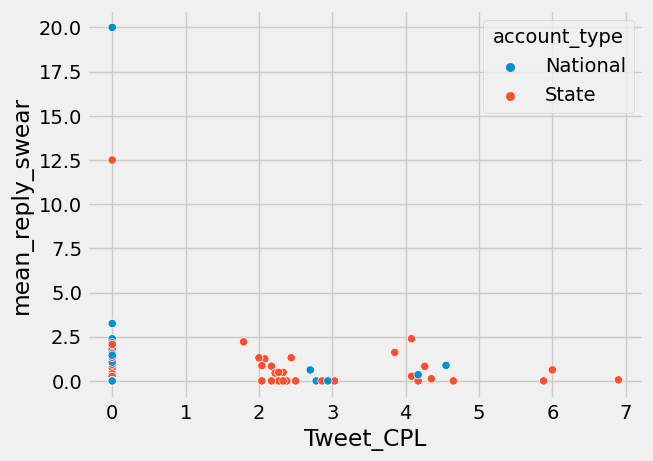

In [130]:
merge_df_reply
_ = sns.scatterplot(x="Tweet_CPL", y="mean_reply_swear", hue="account_type", data=merge_df_reply)


Base level Formula: $Y_{cj} = {\Pi}_{0} + \sum \limits _{j=1} ^{2} {\Pi}_{0j} + \sum \limits _{j=1} ^{2} X_{cj} {\alpha}_{j} $

[['National', -0.02740453420701794], ['State', 0.047338704995194505]]

,group,alpha
0,National,-0.027405
1,State,0.047339


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0100      0.037      0.267      0.834      -0.465       0.485
MSE=0.003


(-0.1, 0.2)

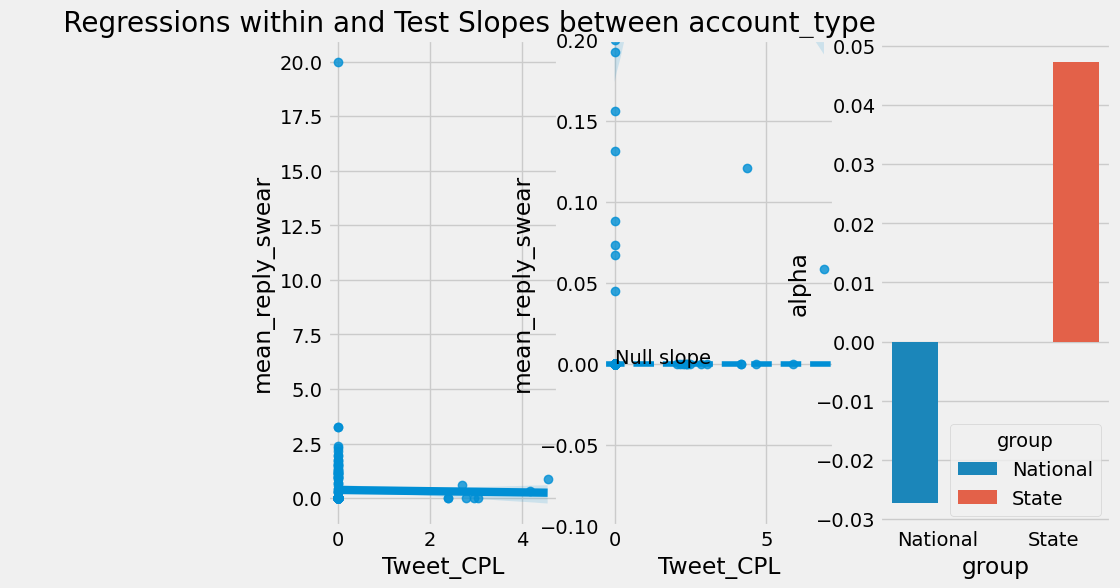

In [131]:
# Account <> State

import statsmodels.formula.api as smf

x, y, group = 'Tweet_CPL', 'mean_reply_swear', 'account_type'

lv1 = [[group_lab, smf.ols('%s ~ %s' % (y, x), group_df).fit().params[x]]
       for group_lab, group_df in merge_df_reply.groupby(group)]

display(lv1)

# for group_lab, group_df in merge_df_reply.groupby(group):
#     display(group_lab)
#     display(group_df)

# Displaying author_name type and beta values
# lv1 = pd.DataFrame({'author_name' : [lv1[0][0], lv1[1][0], lv1[2][0], lv1[3][0], lv1[4][0], lv1[5][0], lv1[6][0], lv1[7][0], lv1[8][0], lv1[9][0]],\
#                     'alpha': [lv1[0][1], lv1[1][1], lv1[2][1], lv1[3][1], lv1[4][1], lv1[5][1], lv1[6][1], lv1[7][1], lv1[8][1], lv1[9][1]]})

lv1 = pd.DataFrame({'group' : [lv1[0][0], lv1[1][0]],\
                    'alpha': [lv1[0][1], lv1[1][1]]})
display(lv1)

# Level 2 model test alpha_Tweet_CPL != 0
lm_hm = smf.ols('alpha ~ 1', lv1).fit()
print(lm_hm.t_test('Intercept'))
print("MSE=%.3f" % lm_hm.mse_resid)

fig, axes = plt.subplots(1, 3, figsize=(9, 6))
for group_lab, group_df in merge_df_reply.groupby(group):
    if group_lab == 'National':
        sns.regplot(x=x, y=y, data=group_df, ax=axes[0])
    else:
        sns.regplot(x=x, y=y, data=group_df, ax=axes[1])
    
axes[0].set_title("      Regressions within and Test Slopes between %s" % group)

_ = sns.barplot(x='group', y="alpha", hue='group', data=lv1, ax=axes[2])
axes[1].axhline(0, ls='--')
axes[1].text(0, 0, "Null slope")
axes[1].set_ylim(-.1, 0.2)


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0274      0.157     -0.175      0.861      -0.335       0.280
MSE=1.939
Model parameters:
Intercept                          0.376640
account_type[T.State]             -0.083241
Tweet_CPL                         -0.027405
Tweet_CPL:account_type[T.State]    0.074743
dtype: float64
191
371


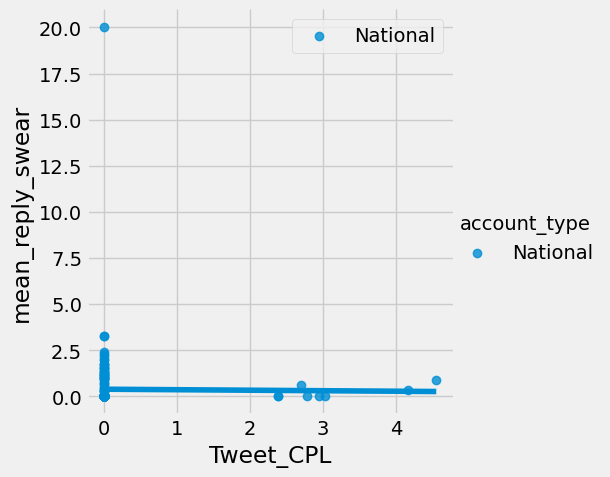

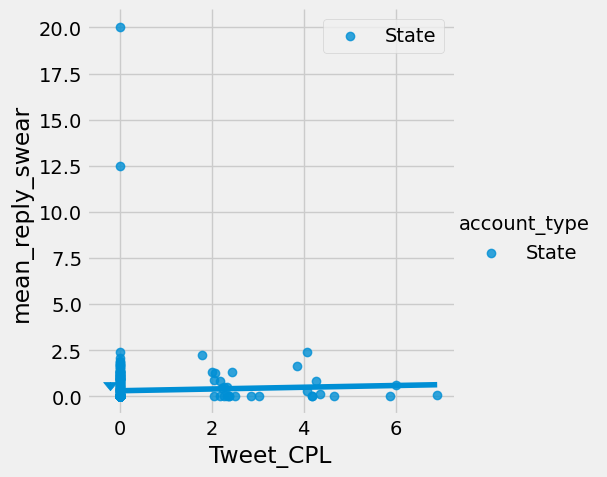

In [132]:
# Remove the outliers
# cols = ['i', 'we', 'Affect', 'tone_pos',
#        'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx',
#        'emo_anger', 'emo_sad', 'swear', 'Social', 'socbehav', 'prosocial',
#        'conflict', 'moral', 'comm', 
#        'money', 'relig', 'death', 'risk', 'focuspast',
#        'focusfuture', 'Tweet_AS', 'Tweet_CPL',
#        'Tweet_agency', 'Tweet_value_communion', 'Tweet_power',
#        'mean_reply_i', 'mean_reply_we', 'mean_reply_Affect',
#        'mean_reply_tone_pos', 'mean_reply_tone_neg', 'mean_reply_emotion',
#        'mean_reply_emo_pos', 'mean_reply_emo_neg', 'mean_reply_emo_anx',
#        'mean_reply_emo_anger', 'mean_reply_emo_sad', 'mean_reply_swear',
#        'mean_reply_Social', 'mean_reply_socbehav', 'mean_reply_prosocial',
#        'mean_reply_polite', 'mean_reply_conflict', 'mean_reply_moral',
#        'mean_reply_comm', 'mean_reply_money', 'mean_reply_relig',
#        'mean_reply_death', 'mean_reply_risk', 'mean_reply_focuspast',
#        'mean_reply_focusfuture', 'mean_reply_AS', 'mean_reply_CPL',
#        'mean_reply_agency', 'mean_reply_communion', 'mean_reply_power'] 
# Q1 = merge_df_reply[cols].quantile(0.01)
# Q3 = merge_df_reply[cols].quantile(0.99)
# IQR = Q3 - Q1
# merge_df_reply = merge_df_reply[~((merge_df_reply[cols] < (Q1 - 1.5 * IQR)) |(merge_df_reply[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# merge_df_reply

def plot_ancova_fullmodell(x, y, group, df, model, palette=sns.color_palette()):
    print(len(df))
    _ = sns.lmplot(x=x, y=y, hue=group, data=df, fit_reg=False)
    palette = itertools.cycle(palette)
    x_jitter = -0.2

    for group_lab, group_df in df.groupby(group):
        x_ = group_df[x]
        color = next(palette)
        try:
            group_offset = model.params["%s[T.%s]" % (group, group_lab)]
        except:
            group_offset = 0
        y_ = model.params['Intercept'] + model.params['Tweet_CPL'] * \
            x_ + group_offset
#         ax = sns.lineplot(x=x_, y=y_, color='k', linestyle='--')
        y_ = model.predict(df)
        ax = sns.lineplot(x=x_, y=y_, color=color)
        ax.arrow(0+x_jitter, model.params['Intercept'], 0, group_offset,
                 head_width=.3, length_includes_head=True, color=color)
        x_jitter += 0.2

# lv1 = [[group_lab, smf.ols('%s ~ %s' % (y, x), group_df).fit().params[x]]
#        for group_lab, group_df in merge_df_reply.groupby(group)]

ancova_full = smf.ols('mean_reply_swear ~ Tweet_CPL + account_type + Tweet_CPL:account_type', merge_df_reply).fit()

# Full model (including interaction) can use this notation:
# ancova_full = smf.ols('score ~ edu * classroom', df).fit()

# print(sm.stats.anova_lm(lm_fx, typ=3))
# print(lm_fx.summary())
print(ancova_full.t_test('Tweet_CPL'))
print("MSE=%.3f" % ancova_full.mse_resid)

print("Model parameters:")
print(ancova_full.params)

plot_ancova_fullmodell(x='Tweet_CPL', y='mean_reply_swear',
                      group='account_type', df=merge_df_reply.groupby('account_type').get_group('National'), model=ancova_full)

plot_ancova_fullmodell(x='Tweet_CPL', y='mean_reply_swear',
                      group='account_type', df=merge_df_reply.groupby('account_type').get_group('State'), model=ancova_full)


In [52]:
# for x in df.columns:
#     df[x] = df[x] - df[x].mean()
temp_columns = ['Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear']

print(len(merge_df_reply_group_list))
print(len(merge_df_reply_account_type_group_list))


NameError: name 'merge_df_reply_group_list' is not defined

In [20]:
# from pandas import concat

# # Substract by local group mean.
# for idx in range(len(merge_df_reply_group_list)):
#     for jdx in temp_columns:
# #         if jdx == 'Tweet_AS':
#         merge_df_reply_group_list[idx][jdx] = merge_df_reply_group_list[idx][jdx] - merge_df_reply_group_list[idx][jdx].mean()
# #         elif jdx == 'Tweet_CPL':
# #             merge_df_reply_group_list[idx][jdx] = merge_df_reply_group_list[idx][jdx] - merge_df_reply_group_list[idx][jdx].mean()
#     merge_df_reply_group_list[idx]['ri_average'] = merge_df_reply_group_list[idx][['Tweet_AS', 'Tweet_CPL']].mean(axis=1)

# temp_columns_1 = ['Tweet_ID', 'Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear', 'ri_average']

# # Showing 15th dataframe
# display(merge_df_reply_group_list[16][temp_columns_1].dropna())

# for idx in range(len(merge_df_reply_account_type_group_list)):
#     for jdx in temp_columns:
# #         if jdx == 'Tweet_AS':
#         merge_df_reply_group_list[idx][jdx] = merge_df_reply_group_list[idx][jdx] - merge_df_reply_group_list[idx][jdx].mean()
# #         elif jdx == 'Tweet_CPL':
# #             merge_df_reply_group_list[idx][jdx] = merge_df_reply_group_list[idx][jdx] - merge_df_reply_group_list[idx][jdx].mean()

# temp_columns_1 = ['Tweet_ID', 'Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear', 'ri_average']

# # Showing 15th dataframe
# display(merge_df_reply_account_type_group_list[1][temp_columns_1].dropna())


In [22]:
# for idx in range(len(merge_df_reply_group_list)):
#     temp_columns_1 = ['Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear', 'ri_average']
#     print("\n\nFor Texas username:= ", merge_df_reply_group_list[idx]['author_name'][0])
#     display(merge_df_reply_group_list[idx][temp_columns_1].corr())
    
# # for idx in range(len(merge_df_reply_account_type_group_list)):
# #     print("\n\nFor Texas Account Type:= ", merge_df_reply_account_type_group_list[idx]['author_name'][0])
# #     display(merge_df_reply_account_type_group_list[idx][temp_columns_1].corr())

# mean_reply_swear ~ alpha + Tweet_AS + Tweet_CPL + error

In [23]:
# for idx in range(len(merge_df_reply_group_list)):
#     print("For Texas username:= ", merge_df_reply_group_list[idx]['author_name'][0])
#     est = smf.ols(formula='mean_reply_swear ~ Tweet_AS +  Tweet_CPL', data=merge_df_reply_group_list[idx]).fit()
#     print(est.summary()) 
#     break

#     # Random intercept
# #     display(merge_df_reply_group_list[idx][['ri_average']][0:merge_df_reply_group_list[idx][['ri_average']].shape[0]].mean())

# from IPython.display import Markdown, display
# def printmd(string):
#     display(Markdown(string))
    

NameError: name 'merge_df_reply_group_list' is not defined

In [ ]:
for idx in range(len(merge_df_reply_group_list)):
    print("\n**\n\nFor Texas username:= ", merge_df_reply_group_list[idx]['author_name'][0])
    X = merge_df_reply_group_list[idx][['Tweet_AS', 'Tweet_CPL']]
    Y = merge_df_reply_group_list[idx]['mean_reply_swear']
    
    # Add constant in statsmodel alpha
    X = sm.add_constant(X)
    
    display(X.head())
    
    # fit model
    reg_res = sm.OLS(Y, X).fit()

    # Model Summary
    print(reg_res.summary())
    
    print('The constant term for the regression line is ', str(round(reg_res.params['const'], 2)))
    print('We predict that one additional Tweet_AS chnages that mean_reply_swear by ', str(round(reg_res.params['Tweet_AS'], 2)))
    print('We predict that one additional Tweet_CPL chnages that mean_reply_swear by ', str(round(reg_res.params['Tweet_CPL'], 2)))
    print('Tweet_AS and Tweet_CPL explain ', str(round(100 * reg_res.rsquared_adj, 1)), '% of the variance in mean_reply_swear')
    
    print("Model Prediction(MAX):= ", reg_res.predict([1, merge_df_reply_group_list[idx]['Tweet_AS'].max(), merge_df_reply_group_list[idx]['Tweet_CPL'].max()]))
    print("Model Prediction(MIN):= ", reg_res.predict([1, merge_df_reply_group_list[idx]['Tweet_AS'].min(), merge_df_reply_group_list[idx]['Tweet_CPL'].min()]))

    pred = reg_res.predict(X)
    merge_df_reply_group_list[idx]['pred_mean_reply_swear'] = pred
    display(merge_df_reply_group_list[idx][['Tweet_ID', 'Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear', 'pred_mean_reply_swear']].head())
    
    # Residual sum up to zero.
    print("Residual Sum:= ", sum(merge_df_reply_group_list[idx]['mean_reply_swear'] - merge_df_reply_group_list[idx]['pred_mean_reply_swear']))
        

In [ ]:
for idx in range(len(merge_df_reply_account_type_group_list)):
    print("\n**\n\nFor Texas username:= ", merge_df_reply_account_type_group_list[idx]['account_type'][0])
    X = merge_df_reply_account_type_group_list[idx][['Tweet_AS', 'Tweet_CPL']]
    Y = merge_df_reply_account_type_group_list[idx]['mean_reply_swear']
    
    # Add constant in statsmodel 
    X = sm.add_constant(X)
    
    print("Number of Tweets from Government account: ", X.shape)
    display(X)
    
    # fit model
    reg_res = sm.OLS(Y, X).fit()

    # Model Summary
    print(reg_res.summary())
    
    print('The constant term for the regression line is ', str(round(reg_res.params['const'], 2)))
    print('We predict that one additional Tweet_AS chnages that mean_reply_swear by ', str(round(reg_res.params['Tweet_AS'], 2)))
    print('We predict that one additional Tweet_CPL chnages that mean_reply_swear by ', str(round(reg_res.params['Tweet_CPL'], 2)))
    print('Tweet_AS and Tweet_CPL explain ', str(round(100 * reg_res.rsquared_adj, 1)), '% of the variance in mean_reply_swear')
    
    print("Model Prediction(MAX):= ", reg_res.predict([1, merge_df_reply_account_type_group_list[idx]['Tweet_AS'].max(), merge_df_reply_account_type_group_list[idx]['Tweet_CPL'].max()]))
    print("Model Prediction(MIN):= ", reg_res.predict([1, merge_df_reply_account_type_group_list[idx]['Tweet_AS'].min(), merge_df_reply_account_type_group_list[idx]['Tweet_CPL'].min()]))

    pred = reg_res.predict(X)
    merge_df_reply_account_type_group_list[idx]['pred_mean_reply_swear'] = pred
    display(merge_df_reply_account_type_group_list[idx][['Tweet_ID', 'Tweet_AS', 'Tweet_CPL', 'mean_reply_swear', 'pred_mean_reply_swear']])
    
    # Residual sum up to zero.
    print("Residual Sum:= ", sum(merge_df_reply_account_type_group_list[idx]['mean_reply_swear'] - merge_df_reply_account_type_group_list[idx]['pred_mean_reply_swear']))


In [ ]:
temp = idx.groupby('author_name')
temp = temp.getgroup('IDPH')
temp

In [66]:
merge_df_reply['Month'] = merge_df_reply['Date'].dt.month
merge_df_reply['Quarter'] = merge_df_reply['Date'].dt.quarter
merge_df_reply = merge_df_reply.reset_index(drop=True)

# Remove the outliers
# cols = ['i', 'we', 'power', 'Affect', 'tone_pos',
#        'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx',
#        'emo_anger', 'emo_sad', 'swear', 'Social', 'socbehav', 'prosocial',
#        'polite', 'conflict', 'moral', 'comm', 'Culture', 'politic',
#        'ethnicity', 'money', 'relig', 'death', 'risk', 'focuspast',
#        'focuspresent', 'focusfuture', 'Tweet_AS', 'Tweet_CPL',
#        'Tweet_agency', 'Tweet_value_communion', 'Tweet_power',
#        'mean_reply_i', 'mean_reply_we', 'mean_reply_Affect',
#        'mean_reply_tone_pos', 'mean_reply_tone_neg', 'mean_reply_emotion',
#        'mean_reply_emo_pos', 'mean_reply_emo_neg', 'mean_reply_emo_anx',
#        'mean_reply_emo_anger', 'mean_reply_emo_sad', 'mean_reply_swear',
#        'mean_reply_Social', 'mean_reply_socbehav', 'mean_reply_prosocial',
#        'mean_reply_polite', 'mean_reply_conflict', 'mean_reply_moral',
#        'mean_reply_comm', 'mean_reply_money', 'mean_reply_relig',
#        'mean_reply_death', 'mean_reply_risk', 'mean_reply_focuspast',
#        'mean_reply_focusfuture', 'mean_reply_AS', 'mean_reply_CPL',
#        'mean_reply_agency', 'mean_reply_communion', 'mean_reply_power'] 
# Q1 = merge_df_reply[cols].quantile(0.01)
# Q3 = merge_df_reply[cols].quantile(0.99)
# IQR = Q3 - Q1
# merge_df_reply = merge_df_reply[~((merge_df_reply[cols] < (Q1 - 1.5 * IQR)) |(merge_df_reply[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# merge_df_reply


In [133]:
def plot_ancova_fullmodel(x, y, group, df, model, palette=sns.color_palette()):
    _ = sns.lmplot(x=x, y=y, hue=group, data=df, fit_reg=False)
    palette = itertools.cycle(palette)
    x_jitter = -0.2

    for group_lab, group_df in df.groupby(group):
        x_ = group_df[x]
        color = next(palette)
        try:
            group_offset = model.params["%s[T.%s]" % (group, group_lab)]
        except:
            group_offset = 0
        y_ = model.params['Intercept'] + model.params['Tweet_CPL'] * x_ + group_offset
#         ax = sns.lineplot(x=x_, y=y_, color='k', linestyle='--')
        y_ = model.predict(df)
        ax = sns.lineplot(x=x_, y=y_, color='r')
        ax.arrow(0+x_jitter, model.params['Intercept'], 0, group_offset,
                 head_width=.3, length_includes_head=True, color=color)
        x_jitter += 0.2

# mean_reply_swear ~ Tweet_CPL + account_type + Tweet_CPL:account_type
# mean_reply_swear ~ account_type:Quarter + Tweet_CPL + Tweet_CPL:account_type:Quarter
ancova_full = smf.ols('mean_reply_swear ~ Tweet_CPL +  account_type + Quarter +  account_type: Quarter + Tweet_CPL:account_type + Tweet_CPL :account_type: Quarter', merge_df_reply).fit()
# Full model (including interaction) can use this notation:
# ancova_full = smf.ols('score ~ edu * classroom', df).fit()

# print(sm.stats.anova_lm(lm_fx, typ=3))
# print(lm_fx.summary())
print(ancova_full.t_test('Tweet_CPL'))
print("MSE=%.3f" % ancova_full.mse_resid)

print("Model parameters:")
print(ancova_full.params)

plot_ancova_fullmodel(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(1), model=ancova_full)

plot_ancova_fullmodel(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(2), model=ancova_full)

plot_ancova_fullmodel(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(3), model=ancova_full)

plot_ancova_fullmodel(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(4), model=ancova_full)

plot_ancova_fullmodel(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(1), model=ancova_full)

plot_ancova_fullmodel(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(2), model=ancova_full)

plot_ancova_fullmodel(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(3), model=ancova_full)

plot_ancova_fullmodel(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(4), model=ancova_full)

# Note:
# The same slope (associated to Tweet_CPL) with different interpcept, depicted as dashed black lines. 
# Moreover we added, as solid lines, the model’s prediction that account different slopes.


PatsyError: Error evaluating factor: NameError: name 'Quarter' is not defined
    mean_reply_swear ~ Tweet_CPL +  account_type + Quarter +  account_type: Quarter + Tweet_CPL:account_type + Tweet_CPL :account_type: Quarter
                                                   ^^^^^^^

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0226      0.085     -0.267      0.790      -0.189       0.144
MSE=0.412
Model parameters:
Intercept                                   0.625987
account_type[T.State]                      -0.150248
Tweet_CPL                                  -0.022646
Tweet_CPL:account_type[T.State]             0.009133
Quarter                                    -0.106131
account_type[T.State]:Quarter               0.037105
Tweet_CPL:account_type[National]:Quarter    0.002198
Tweet_CPL:account_type[State]:Quarter       0.018040
dtype: float64
209
619
637
538


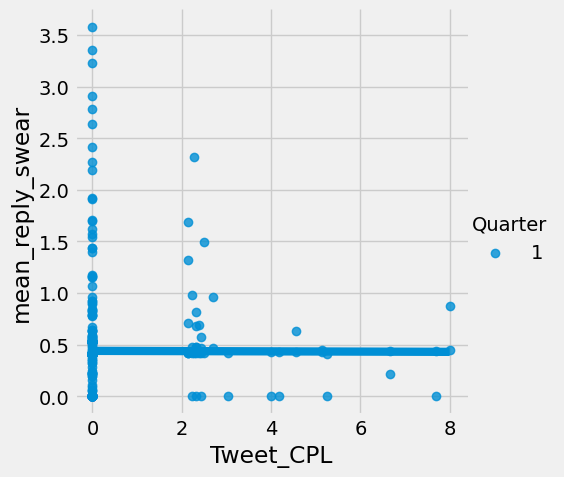

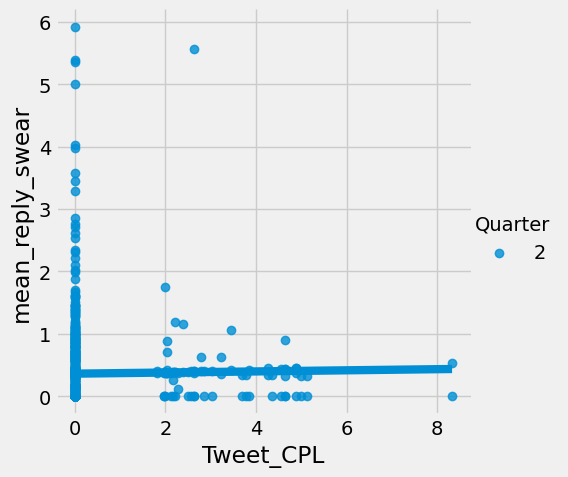

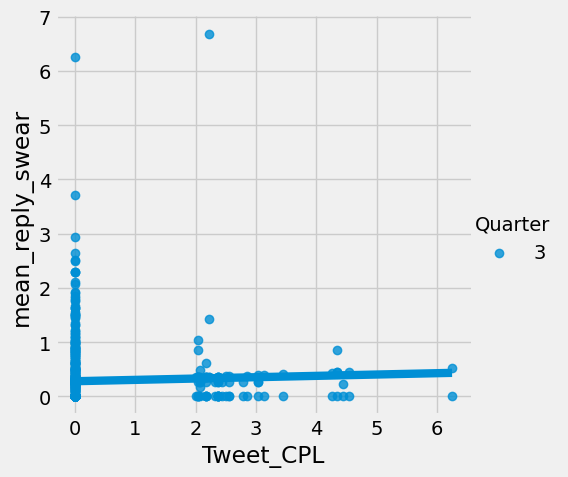

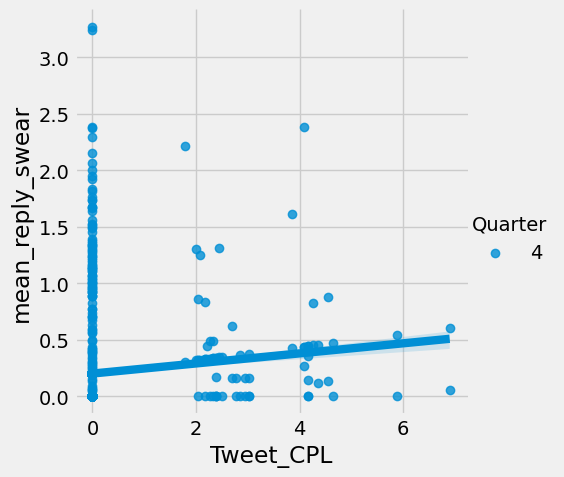

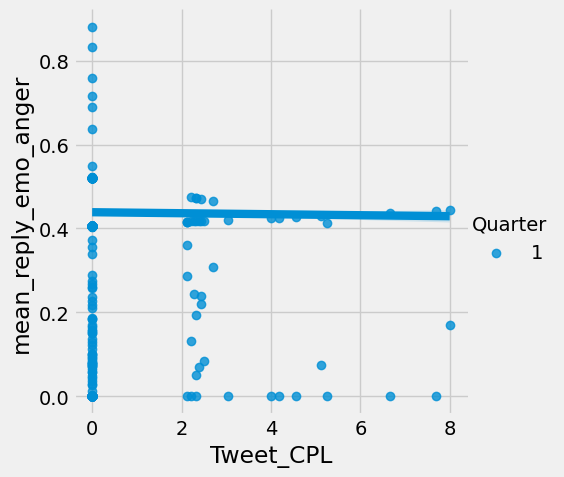

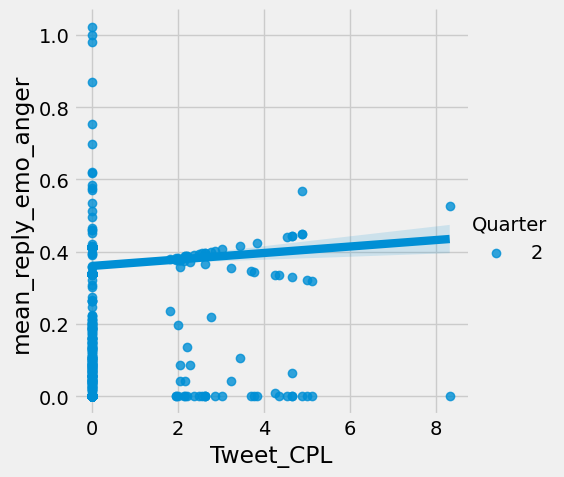

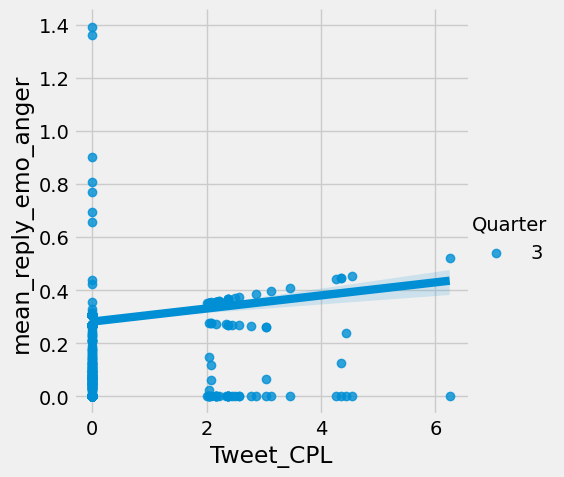

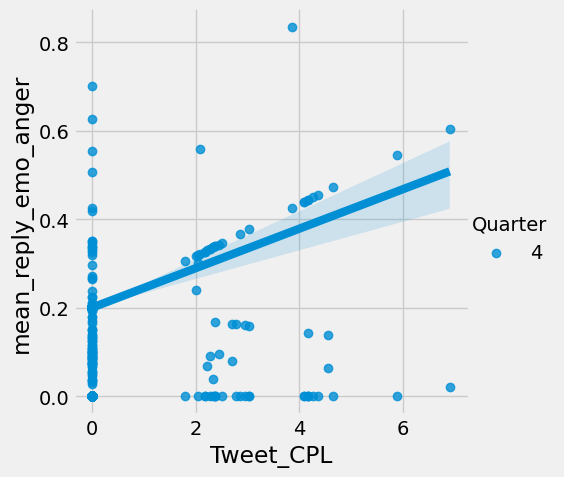

In [99]:
# Make a doc <- Meet tomorrow after 12 PM.

def plot_ancova_fullmodel_swear(x, y, group, df, model, palette=sns.color_palette()):
    _ = sns.lmplot(x=x, y=y, hue=group, data=df, fit_reg=False)
    palette = itertools.cycle(palette)
    x_jitter = -0.2

    for group_lab, group_df in df.groupby(group):
        print(len(group_df))
        x_ = group_df[x]
        color = next(palette)
        try:
            group_offset = model.params["%s[T.%s]" % (group, group_lab)]
        except:
            group_offset = 0
        y_ = model.params['Intercept'] + model.params['Tweet_CPL'] * x_ + group_offset
        y_ = model.predict(df)
        lv1 = pd.DataFrame({'Tweet_CPL' : x_, 'mean_reply_swear': y_})
        ax = sns.regplot(x='Tweet_CPL', y='mean_reply_swear', data=lv1, fit_reg=True)
        ax.arrow(0+x_jitter, model.params['Intercept'], 0, group_offset,
                 head_width=.3, length_includes_head=True, color=color)
        x_jitter += 0.2
        
def plot_ancova_fullmodel_anger(x, y, group, df, model, palette=sns.color_palette()):
    _ = sns.lmplot(x=x, y=y, hue=group, data=df, fit_reg=False)
    palette = itertools.cycle(palette)
    x_jitter = -0.2

    for group_lab, group_df in df.groupby(group):
        x_ = group_df[x]
        color = next(palette)
        try:
            group_offset = model.params["%s[T.%s]" % (group, group_lab)]
        except:
            group_offset = 0
        y_ = model.params['Intercept'] + model.params['Tweet_CPL'] * x_ + group_offset
        y_ = model.predict(df)
        lv1 = pd.DataFrame({'Tweet_CPL' : x_, 'mean_reply_emo_anger': y_})
        ax = sns.regplot(x='Tweet_CPL', y='mean_reply_emo_anger', data=lv1, fit_reg=True)
        ax.arrow(0+x_jitter, model.params['Intercept'], 0, group_offset,
                 head_width=.3, length_includes_head=True, color=color)
        x_jitter += 0.2

ancova_full = smf.ols('mean_reply_swear ~ Tweet_CPL +  account_type + Quarter +  account_type: Quarter + Tweet_CPL:account_type + Tweet_CPL :account_type: Quarter', merge_df_reply).fit()
print(ancova_full.t_test('Tweet_CPL'))
print("MSE=%.3f" % ancova_full.mse_resid)

print("Model parameters:")
print(ancova_full.params)

plot_ancova_fullmodel_swear(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(1), model=ancova_full)

plot_ancova_fullmodel_swear(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(2), model=ancova_full)

plot_ancova_fullmodel_swear(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(3), model=ancova_full)

plot_ancova_fullmodel_swear(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(4), model=ancova_full)

plot_ancova_fullmodel_anger(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(1), model=ancova_full)

plot_ancova_fullmodel_anger(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(2), model=ancova_full)

plot_ancova_fullmodel_anger(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(3), model=ancova_full)

plot_ancova_fullmodel_anger(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(4), model=ancova_full)